In [2]:
import tensorflow as tf
import matplotlib.pyplot as pt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
import cv2 as cv

In [3]:
mnist = tf.keras.datasets.mnist

In [4]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [5]:
x_train.shape,x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [6]:
y_train.shape,y_test.shape

((60000,), (10000,))

In [7]:
def image_plot(i):
    pt.imshow(x_train[i])
    plt.title(y_train[i])
    pt.show()
    pt.imshow(x_train[i],cmap=pt.cm.binary)
    plt.title(y_train[i])
    pt.show()

2


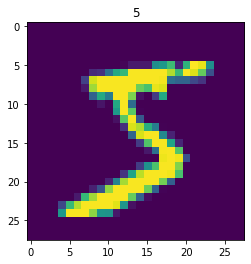

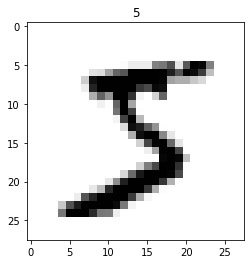

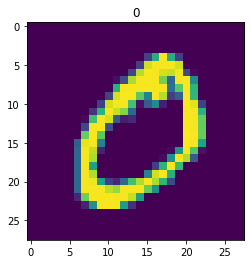

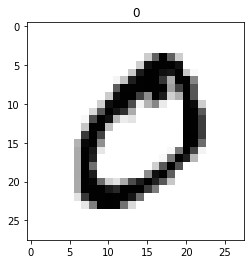

In [8]:
x=int(input())
for i in range(0,x):
    image_plot(i)

In [9]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

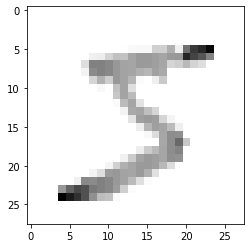

In [10]:
#normalizing training and testing data
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)
pt.imshow(x_train[0],cmap=pt.cm.binary)
pt.show()

In [11]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [12]:
print(y_train[0])  #label

5


In [13]:
#converting classes to one hot vector
img_size=28
x_train_arr=np.array(x_train).reshape(-1,img_size,img_size,1)#increasing 1 dimension
x_test_arr=np.array(x_test).reshape(-1,img_size,img_size,1)
print("Training Sample Solution",x_train_arr.shape)
print("Testing Sample Solution",x_test_arr.shape)

Training Sample Solution (60000, 28, 28, 1)
Testing Sample Solution (10000, 28, 28, 1)


In [14]:
#Creating neural network
model=Sequential()

#first convolutional layer
model.add(Conv2D(64,(3,3),input_shape=x_train_arr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#2nd
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#3rd
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#fully connected layers 1
model.add(Flatten()) #2D to 1D
model.add(Dense(64))
model.add(Activation("relu"))

#fully connected layers 2
model.add(Dense(32))
model.add(Activation("relu"))

#last fully connected layers, must have 10 classes (0-9)
model.add(Dense(10)) #last dense function must be 10
model.add(Activation("softmax")) #(Class probabilities)



In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
activation_1 (Activation)    (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          3

In [16]:
#compiling model
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

In [17]:
#Callbacks
from keras.callbacks import EarlyStopping, ModelCheckpoint

#Earlystopping
ES=EarlyStopping(monitor='val_accuracy',min_delta=0.01,patience=4,verbose=1)

#Model Check point
MCP=ModelCheckpoint("./model.h5",monitor='val_accuracy',verbose=1,save_best_only=True)

CB=[ES,MCP]

In [59]:
#training
model.fit(x_train_arr,y_train,epochs=5,validation_split=0.2,callbacks=CB)

Epoch 1/5
1500/1500 [==============================] - 39s 26ms/step - loss: 0.0430 - accuracy: 0.9864 - val_loss: 0.0618 - val_accuracy: 0.9817

Epoch 00001: val_accuracy improved from 0.98067 to 0.98167, saving model to .\model.h5
Epoch 2/5
1500/1500 [==============================] - 45s 30ms/step - loss: 0.0341 - accuracy: 0.9889 - val_loss: 0.0646 - val_accuracy: 0.9826

Epoch 00002: val_accuracy improved from 0.98167 to 0.98258, saving model to .\model.h5
Epoch 3/5
1500/1500 [==============================] - 44s 30ms/step - loss: 0.0289 - accuracy: 0.9908 - val_loss: 0.0656 - val_accuracy: 0.9814

Epoch 00003: val_accuracy did not improve from 0.98258
Epoch 4/5
1500/1500 [==============================] - 45s 30ms/step - loss: 0.0233 - accuracy: 0.9925 - val_loss: 0.0693 - val_accuracy: 0.9823

Epoch 00004: val_accuracy did not improve from 0.98258
Epoch 5/5
1500/1500 [==============================] - 47s 31ms/step - loss: 0.0201 - accuracy: 0.9929 - val_loss: 0.0569 - val_accu

In [61]:
#Evaluation
test_loss,test_acc=model.evaluate(x_test_arr,y_test)
print("Test loss on 12000 dataset",test_loss)
print("validation Accuracy on 12000 dataset",test_acc)

313/313 [==============================] - 2s 6ms/step - loss: 0.0566 - accuracy: 0.9863
Test loss on 12000 dataset 0.0566316656768322
validation Accuracy on 12000 dataset 0.986299991607666


In [62]:
#Prediction
prediction=model.predict([x_test_arr])

In [63]:
print(prediction)

[[1.1820749e-10 3.8918013e-10 1.5568229e-09 ... 1.0000000e+00
  6.0031196e-13 2.9156044e-09]
 [3.5674265e-07 1.3994458e-07 9.9999928e-01 ... 1.7835778e-09
  2.4686084e-09 3.4452816e-09]
 [7.4346147e-09 9.9999821e-01 2.5055158e-07 ... 1.0101452e-07
  1.1146522e-06 3.0266548e-08]
 ...
 [3.8147220e-12 4.3667740e-08 8.6441583e-12 ... 1.6618596e-08
  8.3374573e-07 4.0769162e-08]
 [2.2157330e-12 3.6574719e-11 8.1442557e-15 ... 5.9971044e-19
  3.2671679e-08 3.1217928e-10]
 [5.1447948e-08 6.9735147e-09 6.0931308e-07 ... 1.6348912e-14
  1.4129600e-07 3.4254338e-08]]


In [64]:
#converting prdiction from one hot encoding
print(np.argmax(prediction[0])) #returning maximum value index

7


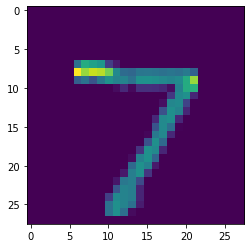

In [65]:
#checking on 0 index
plt.imshow(x_test[0])

In [66]:
#trying on random value
print(np.argmax(prediction[116]))

4


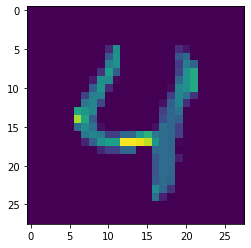

In [67]:
#checking on 4 index
plt.imshow(x_test[4])

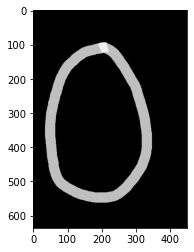

In [68]:
#loading image
img=cv.imread('0.png')
plt.imshow(img)

#converting to grayscale image
gray=cv.cvtColor(img,cv.COLOR_BGR2GRAY)

resized=cv.resize(gray,(28,28),interpolation=cv.INTER_AREA)

newimg=tf.keras.utils.normalize(resized,axis=1)

newimg=np.array(newimg).reshape(-1,img_size, img_size,1)

predictions=model.predict(newimg)

In [69]:
print(np.argmax(predictions))

0


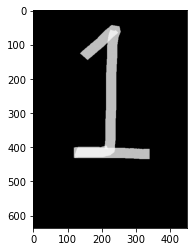

In [70]:
#loading image
img=cv.imread('1.png')
plt.imshow(img)

#converting to grayscale image
gray=cv.cvtColor(img,cv.COLOR_BGR2GRAY)

resized=cv.resize(gray,(28,28),interpolation=cv.INTER_AREA)

newimg=tf.keras.utils.normalize(resized,axis=1)

newimg=np.array(newimg).reshape(-1,img_size, img_size,1)

predictions=model.predict(newimg)

In [71]:
print(np.argmax(predictions))

1


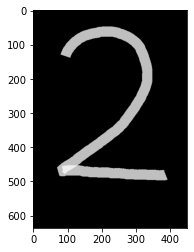

In [72]:
#loading image
img=cv.imread('2.png')
plt.imshow(img)

#converting to grayscale image
gray=cv.cvtColor(img,cv.COLOR_BGR2GRAY)

resized=cv.resize(gray,(28,28),interpolation=cv.INTER_AREA)

newimg=tf.keras.utils.normalize(resized,axis=1)

newimg=np.array(newimg).reshape(-1,img_size, img_size,1)

predictions=model.predict(newimg)

In [73]:
print(np.argmax(predictions))

2


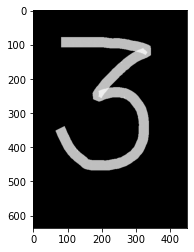

In [74]:
#loading image
img=cv.imread('3.png')
plt.imshow(img)

#converting to grayscale image
gray=cv.cvtColor(img,cv.COLOR_BGR2GRAY)

resized=cv.resize(gray,(28,28),interpolation=cv.INTER_AREA)

newimg=tf.keras.utils.normalize(resized,axis=1)

newimg=np.array(newimg).reshape(-1,img_size, img_size,1)

predictions=model.predict(newimg)

In [75]:
print(np.argmax(predictions))

3


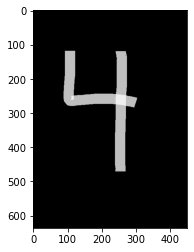

In [116]:
#loading image
img=cv.imread('4.png')
plt.imshow(img)

#converting to grayscale image
gray=cv.cvtColor(img,cv.COLOR_BGR2GRAY)

resized=cv.resize(gray,(28,28),interpolation=cv.INTER_AREA)

newimg=tf.keras.utils.normalize(resized,axis=1)

newimg=np.array(newimg).reshape(-1,img_size, img_size,1)

predictions=model.predict(newimg)

In [117]:
print(np.argmax(predictions))

4


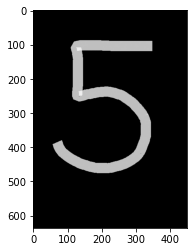

In [78]:
#loading image
img=cv.imread('5.png')
plt.imshow(img)

#converting to grayscale image
gray=cv.cvtColor(img,cv.COLOR_BGR2GRAY)

resized=cv.resize(gray,(28,28),interpolation=cv.INTER_AREA)

newimg=tf.keras.utils.normalize(resized,axis=1)

newimg=np.array(newimg).reshape(-1,img_size, img_size,1)

predictions=model.predict(newimg)

In [79]:
print(np.argmax(predictions))

5


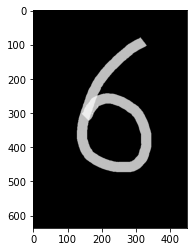

In [80]:
#loading image
img=cv.imread('6.png')
plt.imshow(img)

#converting to grayscale image
gray=cv.cvtColor(img,cv.COLOR_BGR2GRAY)

resized=cv.resize(gray,(28,28),interpolation=cv.INTER_AREA)

newimg=tf.keras.utils.normalize(resized,axis=1)

newimg=np.array(newimg).reshape(-1,img_size, img_size,1)

predictions=model.predict(newimg)

In [81]:
print(np.argmax(predictions))

6


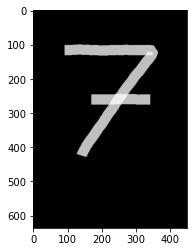

In [83]:
#loading image
img=cv.imread('7.png')
plt.imshow(img)

#converting to grayscale image
gray=cv.cvtColor(img,cv.COLOR_BGR2GRAY)

resized=cv.resize(gray,(28,28),interpolation=cv.INTER_AREA)

newimg=tf.keras.utils.normalize(resized,axis=1)

newimg=np.array(newimg).reshape(-1,img_size, img_size,1)

predictions=model.predict(newimg)

In [84]:
print(np.argmax(predictions))

7


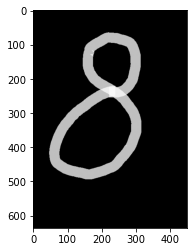

In [85]:
#loading image
img=cv.imread('8.png')
plt.imshow(img)

#converting to grayscale image
gray=cv.cvtColor(img,cv.COLOR_BGR2GRAY)

resized=cv.resize(gray,(28,28),interpolation=cv.INTER_AREA)

newimg=tf.keras.utils.normalize(resized,axis=1)

newimg=np.array(newimg).reshape(-1,img_size, img_size,1)

predictions=model.predict(newimg)

In [86]:
print(np.argmax(predictions))

8


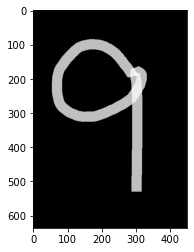

In [89]:
#loading image
img=cv.imread('9.png')
plt.imshow(img)

#converting to grayscale image
gray=cv.cvtColor(img,cv.COLOR_BGR2GRAY)

resized=cv.resize(gray,(28,28),interpolation=cv.INTER_AREA)

newimg=tf.keras.utils.normalize(resized,axis=1)

newimg=np.array(newimg).reshape(-1,img_size, img_size,1)

predictions=model.predict(newimg)

In [90]:
print(np.argmax(predictions))

9
